In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("hourly_data.csv")

data.head()

data.drop(['Date'],axis=1,inplace=True)

from sklearn.preprocessing import minmax_scale

data.isna().sum()

data.dropna(subset=['energy_consumption'], inplace=True)

data.isna().sum()

data.fillna(data.mean(), inplace=True)

data.describe()

cols = data.columns

data = pd.DataFrame(minmax_scale(data[cols]),columns=data.columns,index=data.index)

In [3]:
HORIZON = 1
WINDOW_SIZE = 24

for i in range(WINDOW_SIZE):
    data[f"energy_consumption+{i+1}"] = data["energy_consumption"].shift(periods=i+1)
data.head(10)

X = data.dropna().drop("energy_consumption",axis=1).astype(np.float32)

y = data.dropna()["energy_consumption"].astype(np.float32)

split_size = int(len(X)* 0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

X_train.head()

y_train.head()

24    0.285646
25    0.298004
26    0.303232
27    0.307985
28    0.302757
Name: energy_consumption, dtype: float32

In [4]:
import tensorflow as tf
import os
from tensorflow.keras import layers

In [5]:
def create_model_checkpoint(model_name, save_path = "model_exp"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),verbose=0,save_best_only=True)

tf.random.set_seed(42)

model_6 = tf.keras.Sequential()
model_6.add(tf.keras.layers.Dense(256,activation="sigmoid"))
model_6.add(tf.keras.layers.Dense(128,activation="sigmoid"))
model_6.add(tf.keras.layers.Dense(HORIZON))
model_6._name="model_6_dense"

model_6.compile(loss="mae",optimizer=tf.keras.optimizers.Adam())

model_6.fit(X_train,y_train,epochs=100,batch_size=128,verbose=1,validation_data=(X_test,y_test),callbacks=[create_model_checkpoint(model_name=model_6.name)])

model_6 = tf.keras.models.load_model("model_exp/model_6_dense")
model_6.evaluate(X_test,y_test)

model_6_preds = tf.squeeze(model_6.predict(X_test))

model_6_preds

y_values = y_test.values

model_values = model_6_preds.numpy()

y_values

Epoch 1/100
47/55 [========================>.....] - ETA: 0s - loss: 0.1283

INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


55/55 [==============================] - 10s 75ms/step - loss: 0.1231 - val_loss: 0.0541
Epoch 2/100
55/55 [==============================] - ETA: 0s - loss: 0.0717

INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


55/55 [==============================] - 1s 26ms/step - loss: 0.0717 - val_loss: 0.0424
Epoch 3/100
52/55 [===========================>..] - ETA: 0s - loss: 0.0518

INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


55/55 [==============================] - 2s 28ms/step - loss: 0.0513 - val_loss: 0.0304
Epoch 4/100
55/55 [==============================] - 0s 9ms/step - loss: 0.0418 - val_loss: 0.0353
Epoch 5/100
55/55 [==============================] - 1s 10ms/step - loss: 0.0450 - val_loss: 0.0699
Epoch 6/100
55/55 [==============================] - ETA: 0s - loss: 0.0457

INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


55/55 [==============================] - 2s 30ms/step - loss: 0.0457 - val_loss: 0.0246
Epoch 7/100
55/55 [==============================] - 0s 6ms/step - loss: 0.0418 - val_loss: 0.0482
Epoch 8/100
55/55 [==============================] - 0s 7ms/step - loss: 0.0369 - val_loss: 0.0277
Epoch 9/100
55/55 [==============================] - 1s 12ms/step - loss: 0.0396 - val_loss: 0.0461
Epoch 10/100
55/55 [==============================] - 0s 6ms/step - loss: 0.0371 - val_loss: 0.0465
Epoch 11/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0410 - val_loss: 0.0260
Epoch 12/100
46/55 [========================>.....] - ETA: 0s - loss: 0.0416

INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


55/55 [==============================] - 1s 20ms/step - loss: 0.0420 - val_loss: 0.0238
Epoch 13/100
44/55 [=======================>......] - ETA: 0s - loss: 0.0360

INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


55/55 [==============================] - 1s 22ms/step - loss: 0.0352 - val_loss: 0.0189
Epoch 14/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0336 - val_loss: 0.0281
Epoch 15/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0400 - val_loss: 0.0339
Epoch 16/100
52/55 [===========================>..] - ETA: 0s - loss: 0.0301

INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


55/55 [==============================] - 1s 19ms/step - loss: 0.0300 - val_loss: 0.0179
Epoch 17/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0283 - val_loss: 0.0219
Epoch 18/100
47/55 [========================>.....] - ETA: 0s - loss: 0.0329

INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


55/55 [==============================] - 1s 20ms/step - loss: 0.0332 - val_loss: 0.0163
Epoch 19/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0298 - val_loss: 0.0374
Epoch 20/100
55/55 [==============================] - 0s 7ms/step - loss: 0.0358 - val_loss: 0.0493
Epoch 21/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0313 - val_loss: 0.0168
Epoch 22/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0296 - val_loss: 0.0196
Epoch 23/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0308 - val_loss: 0.0424
Epoch 24/100
55/55 [==============================] - 0s 6ms/step - loss: 0.0276 - val_loss: 0.0225
Epoch 25/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0313 - val_loss: 0.0310
Epoch 26/100
54/55 [============================>.] - ETA: 0s - loss: 0.0333

INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


55/55 [==============================] - 1s 27ms/step - loss: 0.0331 - val_loss: 0.0141
Epoch 27/100
55/55 [==============================] - 1s 11ms/step - loss: 0.0245 - val_loss: 0.0343
Epoch 28/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0308 - val_loss: 0.0522
Epoch 29/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0248 - val_loss: 0.0151
Epoch 30/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0278 - val_loss: 0.0322
Epoch 31/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0353 - val_loss: 0.0237
Epoch 32/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0258 - val_loss: 0.0292
Epoch 33/100
50/55 [==========================>...] - ETA: 0s - loss: 0.0308

INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


55/55 [==============================] - 1s 19ms/step - loss: 0.0302 - val_loss: 0.0140
Epoch 34/100
49/55 [=========================>....] - ETA: 0s - loss: 0.0285

INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


55/55 [==============================] - 1s 18ms/step - loss: 0.0284 - val_loss: 0.0130
Epoch 35/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0304 - val_loss: 0.0211
Epoch 36/100
55/55 [==============================] - 0s 6ms/step - loss: 0.0221 - val_loss: 0.0225
Epoch 37/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0261 - val_loss: 0.0221
Epoch 38/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0320 - val_loss: 0.0297
Epoch 39/100
55/55 [==============================] - 1s 9ms/step - loss: 0.0296 - val_loss: 0.0267
Epoch 40/100
51/55 [==========================>...] - ETA: 0s - loss: 0.0303

INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


55/55 [==============================] - 1s 20ms/step - loss: 0.0297 - val_loss: 0.0128
Epoch 41/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0227 - val_loss: 0.0433
Epoch 42/100
48/55 [=========================>....] - ETA: 0s - loss: 0.0310

INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


55/55 [==============================] - 1s 19ms/step - loss: 0.0301 - val_loss: 0.0120
Epoch 43/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0231 - val_loss: 0.0334
Epoch 44/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0293 - val_loss: 0.0277
Epoch 45/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0225 - val_loss: 0.0166
Epoch 46/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0277 - val_loss: 0.0122
Epoch 47/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0237 - val_loss: 0.0140
Epoch 48/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0262 - val_loss: 0.0296
Epoch 49/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0336 - val_loss: 0.0778
Epoch 50/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0446 - val_loss: 0.0647
Epoch 51/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0330 - val_loss: 0.0263
Epoch 52/100

INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


55/55 [==============================] - 1s 18ms/step - loss: 0.0236 - val_loss: 0.0117
Epoch 56/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0200 - val_loss: 0.0168
Epoch 57/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0220 - val_loss: 0.0180
Epoch 58/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0234 - val_loss: 0.0192
Epoch 59/100
55/55 [==============================] - 0s 6ms/step - loss: 0.0235 - val_loss: 0.0345
Epoch 60/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0304 - val_loss: 0.0241
Epoch 61/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0260 - val_loss: 0.0179
Epoch 62/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0284 - val_loss: 0.0231
Epoch 63/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0228 - val_loss: 0.0305
Epoch 64/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0220 - val_loss: 0.0305
Epoch 65/100

INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


55/55 [==============================] - 1s 19ms/step - loss: 0.0216 - val_loss: 0.0110
Epoch 67/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0258 - val_loss: 0.0223
Epoch 68/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0259 - val_loss: 0.0404
Epoch 69/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0265 - val_loss: 0.0230
Epoch 70/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0260 - val_loss: 0.0344
Epoch 71/100
55/55 [==============================] - 0s 7ms/step - loss: 0.0238 - val_loss: 0.0133
Epoch 72/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0243 - val_loss: 0.0165
Epoch 73/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0254 - val_loss: 0.0309
Epoch 74/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0286 - val_loss: 0.0142
Epoch 75/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0224 - val_loss: 0.0125
Epoch 76/100

INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


55/55 [==============================] - 1s 20ms/step - loss: 0.0222 - val_loss: 0.0107
Epoch 82/100
55/55 [==============================] - 0s 7ms/step - loss: 0.0216 - val_loss: 0.0229
Epoch 83/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0328 - val_loss: 0.0444
Epoch 84/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0322 - val_loss: 0.0187
Epoch 85/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0231 - val_loss: 0.0284
Epoch 86/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0232 - val_loss: 0.0139
Epoch 87/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0225 - val_loss: 0.0107
Epoch 88/100
51/55 [==========================>...] - ETA: 0s - loss: 0.0223

INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


55/55 [==============================] - 1s 18ms/step - loss: 0.0227 - val_loss: 0.0106
Epoch 89/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0252 - val_loss: 0.0141
Epoch 90/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0201 - val_loss: 0.0145
Epoch 91/100
51/55 [==========================>...] - ETA: 0s - loss: 0.0228

INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


55/55 [==============================] - 1s 23ms/step - loss: 0.0230 - val_loss: 0.0106
Epoch 92/100
55/55 [==============================] - 0s 7ms/step - loss: 0.0181 - val_loss: 0.0236
Epoch 93/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0220 - val_loss: 0.0185
Epoch 94/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0229 - val_loss: 0.0222
Epoch 95/100
43/55 [======================>.......] - ETA: 0s - loss: 0.0211

INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


INFO:tensorflow:Assets written to: model_exp/model_6_dense/assets


55/55 [==============================] - 1s 21ms/step - loss: 0.0204 - val_loss: 0.0106
Epoch 96/100
55/55 [==============================] - 0s 7ms/step - loss: 0.0194 - val_loss: 0.0314
Epoch 97/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0294 - val_loss: 0.0175
Epoch 98/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0244 - val_loss: 0.0192
Epoch 99/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0209 - val_loss: 0.0166
Epoch 100/100
55/55 [==============================] - 0s 2ms/step


array([0.41223067, 0.40779468, 0.41001266, ..., 0.40826997, 0.39496198,
       0.38878328], dtype=float32)

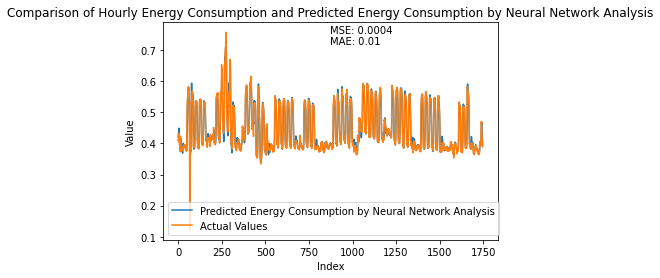

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

plt.plot(model_values, label='Predicted Energy Consumption by Neural Network Analysis')
plt.plot(y_values, label='Actual Values')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Hourly Energy Consumption and Predicted Energy Consumption by Neural Network Analysis')

#predicted_values = data['Predicted'].values
#actual_values = data['energy_consumption'].values

mse = np.mean((y_values - model_values) ** 2)
mse_annotation = f'MSE: {mse:.4f}'

mae = mean_absolute_error(y_values, model_values)
plt.text(0.5, 0.9, f'MAE: {mae:.2f}', transform=plt.gca().transAxes)

plt.annotate(mse_annotation, (0.5, 0.95), xycoords='axes fraction')

plt.legend()

# Display the plot
plt.show()